### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

### 2. Reading .xlsx files into Pandas DataFrames

In [4]:
df_items = pd.read_excel('items.xlsx')
df_orders = pd.read_excel('orders.xlsx')
df_targets = pd.read_excel('targets.xlsx')
df_users = pd.read_excel('users.xlsx')

In [6]:
df_items.head()

,item_id,category
0,61999,beer
1,2395,nab
2,49121,beer
3,2960,beer
4,65448,beer


In [7]:
df_orders.head()

,order_id,order_date,user_id,product_id,revenue
0,8213351680,2024-08-02,75361105,32189,3110.96
1,7536474509,2024-10-29,43580092,60146,645.26
2,5205005404,2024-03-07,75361105,50781,844.18
3,8213351680,2024-08-02,75361105,21032,3110.96
4,2673322804,2024-02-28,75361105,44933,3380.05


In [8]:
df_targets.head()

,user_id,category,city,monthly revenue target
0,10560208,restaurant,São Paulo,3000
1,33198146,restaurant,Rio de Janeiro,7000
2,37404863,restaurant,Rio de Janeiro,75000
3,43580092,bar,São Paulo,5000
4,75361105,bar,Campinas,150000


In [9]:
df_users.head()

,user_id,category,city
0,75361105,bar,Campinas
1,43580092,bar,São Paulo
2,37404863,restaurant,Rio de Janeiro
3,10560208,restaurant,São Paulo
4,86808677,bar,São Paulo


#### 2.1. Exploring Files

##### 2.1.1. DataFrame: df_items

In [10]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   314 non-null    int64 
 1   category  314 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


In [14]:
df_items[df_items.item_id.isna()]

,item_id,category


In [15]:
df_items[df_items.category.isna()]

,item_id,category


There are no null values for the df_items DataFrame

In [19]:
df_items.category.value_counts().reset_index()

,category,count
0,beer,179
1,nab,111
2,liquor,20
3,soda,4


In [29]:
# Abs count
count = df_items['category'].value_counts()

# Relative percent
percent = df_items['category'].value_counts(normalize=True) * 100

# Gathering into an unique DataFrame
result = pd.DataFrame({
    'Count': count,
    'Percentual (%)': percent.round(2)
})

# Adding total line
result.loc['Total'] = [result['Count'].sum(), result['Percentual (%)'].sum()]

# Resetting index to have 'category' as a column
result.reset_index(inplace = True)


In [30]:
result

,category,Count,Percentual (%)
0,beer,179.0,57.01
1,nab,111.0,35.35
2,liquor,20.0,6.37
3,soda,4.0,1.27
4,Total,314.0,100.00


The most expressive category is "beer" with 179 occurrencies (57.01 % approx.)

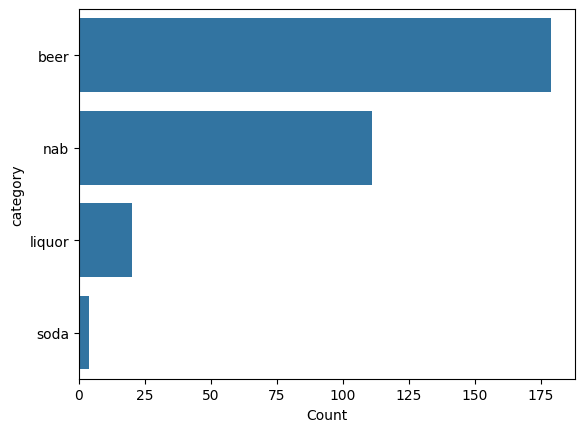

<Figure size 1000x600 with 0 Axes>

In [36]:
sns.barplot(data=result[result['category'] != 'Total'], x='Count', y='category')
plt.figure(figsize=(10, 6))
plt.show()

It indicates that the most categorized item on the database is "beer"

##### 2.1.2. DataFrame: df_users